In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Means each sample is an array of 64 numbers, representing the image

In [4]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 'columns')
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9740740740740741

In [9]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9648148148148148

In [10]:
model = RandomForestClassifier(n_estimators = 8)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9277777777777778

In [11]:
model = RandomForestClassifier(criterion = 'entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.975925925925926

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 51,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0, 53,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 48,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 58]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

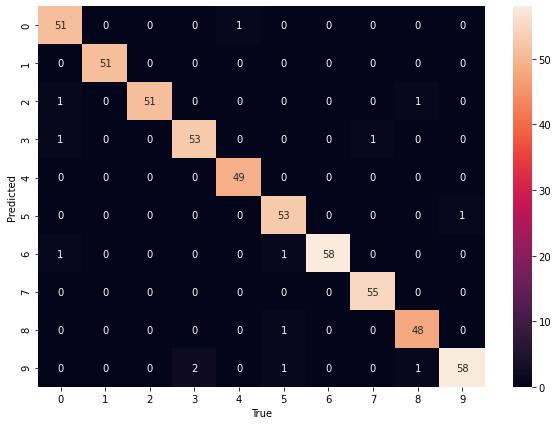

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('True')
plt.ylabel('Predicted')